In [117]:
import warnings
warnings.filterwarnings("ignore")

In [118]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [143]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
car_data=pd.read_csv('/content/drive/MyDrive/Python Course/Car_name.csv')


In [145]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   car_name  398 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [146]:
car_data.shape

(398, 1)

In [147]:
carAttribute=pd.read_json('/content/drive/MyDrive/Python Course/Car_Attributes.json')

In [148]:
carAttribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


Part 1.1 c - Merge both the DataFrames together to form a single DataFrame

In [149]:
merged_df = pd.merge(car_data, carAttribute, left_index=True, right_index=True)

In [150]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


Part 1.1 d -Print 5 point summary of the numerical features and share insights

In [151]:
summary = merged_df.describe()

# Print the five-number summary
print(summary)

# Additional insights:
# Calculate the interquartile range (IQR)
Q1 = summary.loc['25%']
Q3 = summary.loc['75%']
IQR = Q3 - Q1

# Identify potential outliers using the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (merged_df < lower_bound) | (merged_df > upper_bound)
outlier_counts = outliers.sum()

# Print the potential outliers for each column
print("Potential Outliers:")
print(outlier_counts)






              mpg         cyl        disp           wt         acc  \
count  398.000000  398.000000  398.000000   398.000000  398.000000   
mean    23.514573    5.454774  193.425879  2970.424623   15.568090   
std      7.815984    1.701004  104.269838   846.841774    2.757689   
min      9.000000    3.000000   68.000000  1613.000000    8.000000   
25%     17.500000    4.000000  104.250000  2223.750000   13.825000   
50%     23.000000    4.000000  148.500000  2803.500000   15.500000   
75%     29.000000    8.000000  262.000000  3608.000000   17.175000   
max     46.600000    8.000000  455.000000  5140.000000   24.800000   

               yr      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  
Potential Outliers:
acc         7
car_name    0
cyl         0
disp        0
hp   

<Axes: xlabel='mpg'>

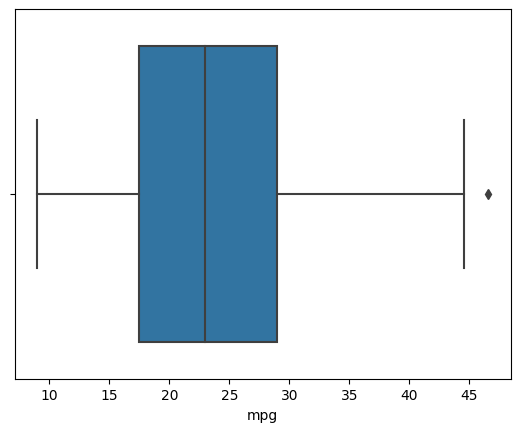

In [61]:
sns.boxplot(x="mpg", data=merged_df)

<Axes: xlabel='cyl'>

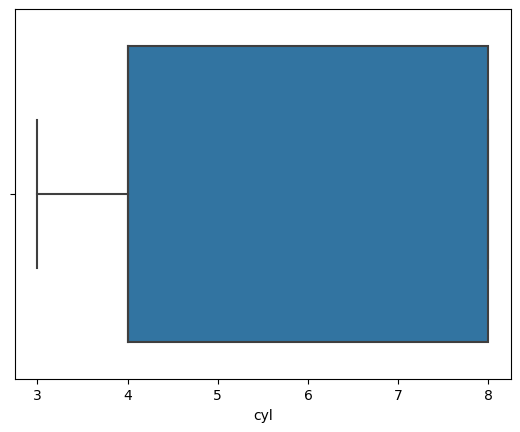

In [62]:
sns.boxplot(x="cyl", data=merged_df)

<Axes: xlabel='acc'>

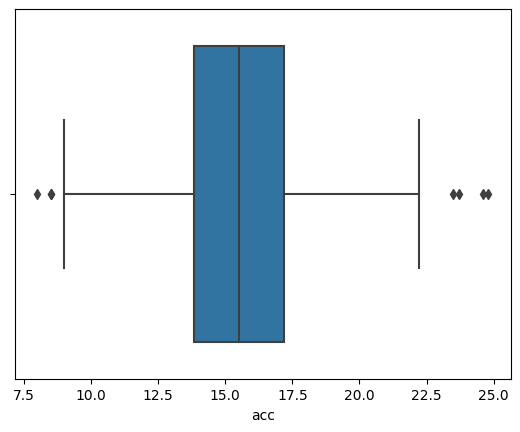

In [63]:
sns.boxplot(x="acc", data=merged_df)

<Axes: xlabel='disp'>

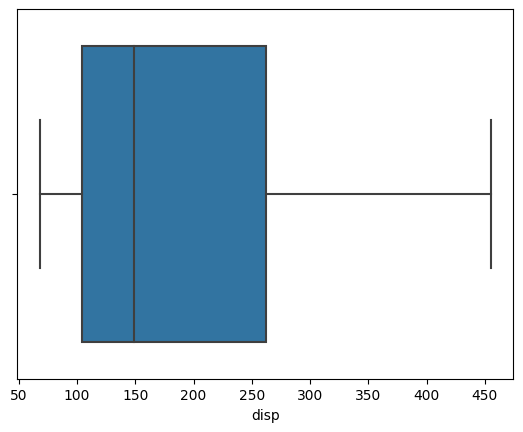

In [64]:
sns.boxplot(x="disp", data=merged_df)

<Axes: xlabel='wt'>

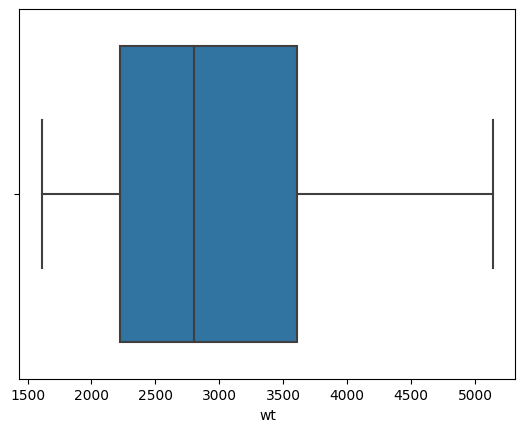

In [65]:
sns.boxplot(x="wt", data=merged_df)

<Axes: xlabel='yr'>

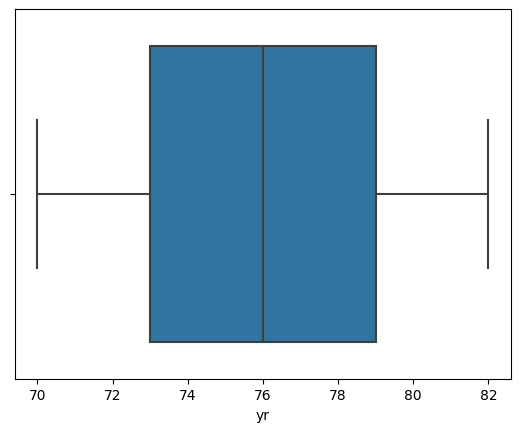

In [66]:
sns.boxplot(x="yr", data=merged_df)

<Axes: xlabel='origin'>

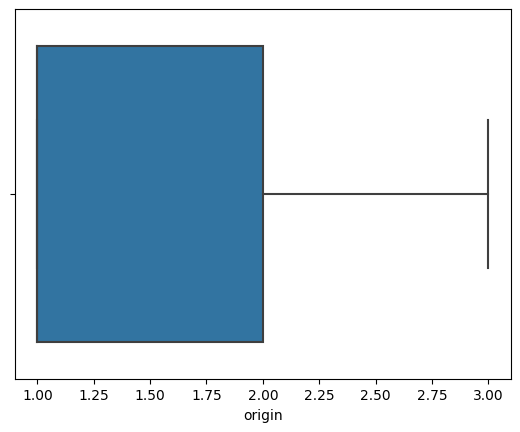

In [67]:
sns.boxplot(x="origin", data=merged_df)

 here are some insights based on the provided summary statistics and potential outliers:

**mpg (Miles per Gallon):**

The average miles per gallon for the vehicles in this dataset is approximately 23.5.
The minimum and maximum miles per gallon are 9 and 46.6, respectively, suggesting a wide range of fuel efficiency among the vehicles.
There is one potential outlier in this column, which might represent a vehicle with an exceptionally high or low fuel efficiency. Further investigation is needed to understand this data point's validity.

**cyl (Number of Cylinders):**

The average number of cylinders in the vehicles is approximately 5.5, with a minimum of 3 and a maximum of 8.
This column doesn't have any potential outliers, and the data appears within the expected range for the number of cylinders in a typical vehicle.

**disp (Displacement):**

The average engine displacement is around 193.4 cubic inches.
Engine displacement ranges from a minimum of 68 cubic inches to a maximum of 455 cubic inches.
Similar to the 'cyl' column, there are no potential outliers in this column.

**wt (Weight):**

The average weight of the vehicles is approximately 2970 pounds.
Vehicle weight ranges from a minimum of 1613 pounds to a maximum of 5140 pounds.
There are no potential outliers in this column.

**acc (Acceleration):**

The average acceleration is about 15.6 seconds for the vehicles to reach 60 miles per hour.
Acceleration times vary, with a minimum of 8 seconds and a maximum of 24.8 seconds.
Seven potential outliers have been identified in this column. These outliers may represent vehicles with significantly faster or slower acceleration. Further examination is required to assess the validity of these data points.

**yr (Year):**

The dataset covers a range of years from 1970 to 1982.
The 'yr' column does not contain any potential outliers.

**origin (Origin):**

The 'origin' column represents the origin of the vehicle, and its values range from 1 to 3.
There are no potential outliers in this categorical column.







Part 1.2 a - Check and print feature-wise percentage of
missing values present in the data and impute with the
best suitable approach

In [152]:
null_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100

print("Null Value Percentage for Each Column:")
print(null_percentage)

Null Value Percentage for Each Column:
car_name    0.0
mpg         0.0
cyl         0.0
disp        0.0
hp          0.0
wt          0.0
acc         0.0
yr          0.0
origin      0.0
dtype: float64


In [153]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [154]:
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in car_name: ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota 

Part 1.2 b - Check for duplicate values in the data and
impute with the best suitable approach.

In [155]:
duplicate_rows = merged_df[merged_df.duplicated()]

# Check if there are any duplicate rows
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No Duplicate Rows Found")

No Duplicate Rows Found


Part 1.2 c - Plot a pairplot for all features.

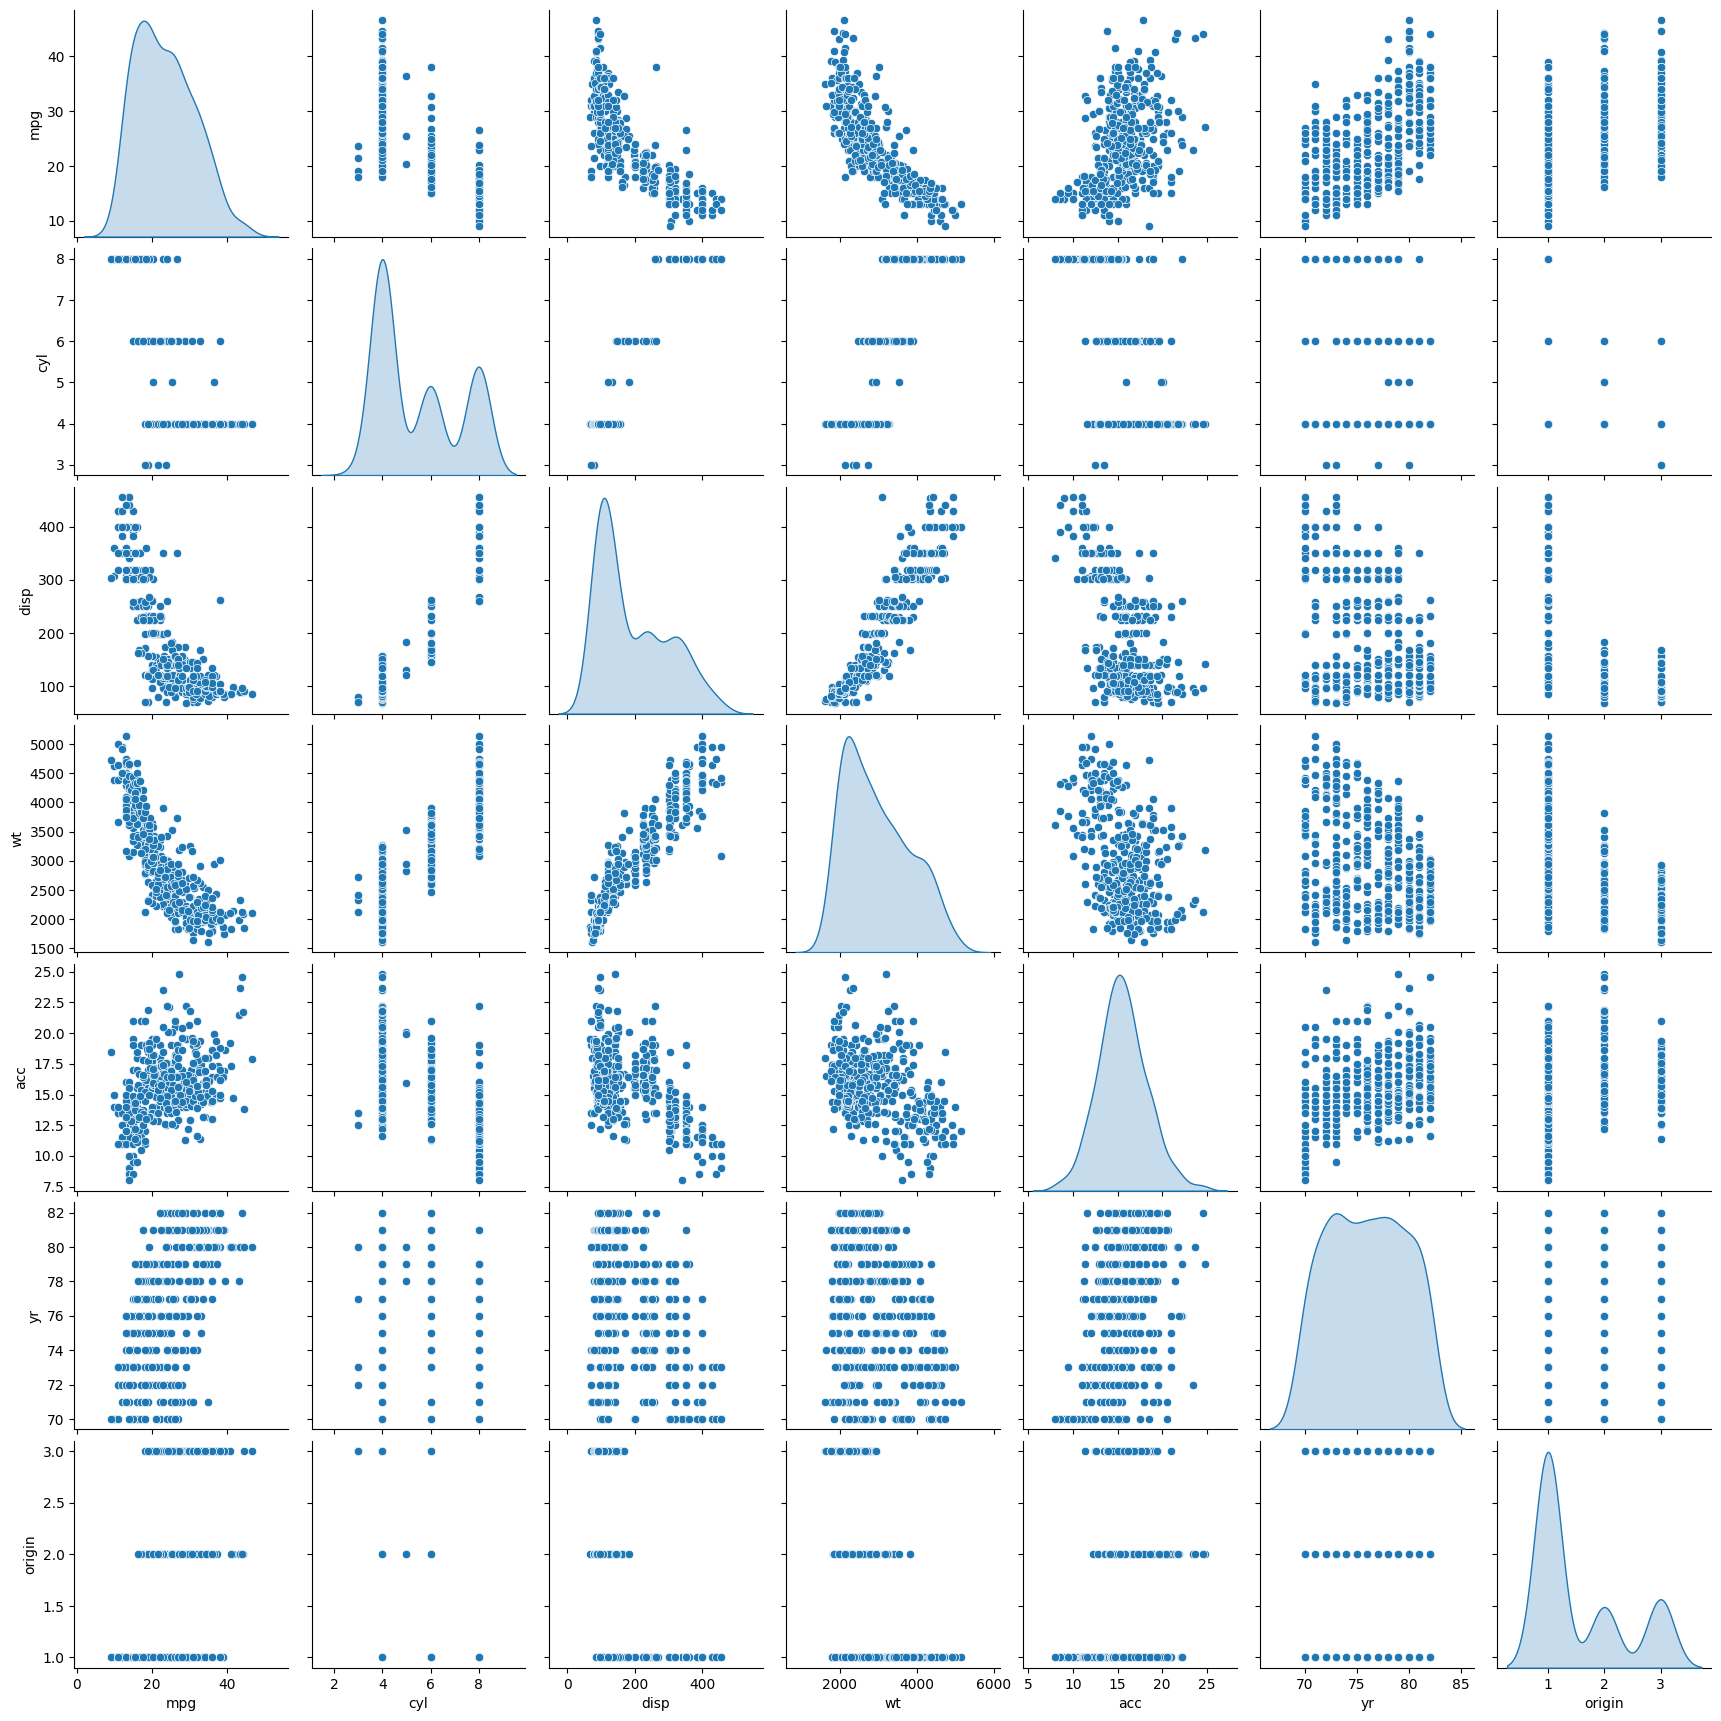

In [72]:
sns.pairplot(merged_df, diag_kind='kde')

# Show the plot
plt.show()

Comment : Overall we see 3 peaks in the data distribution, indicating possibly 3 clusters

 High (negative) correlation of the mpg variable with cyl, disp, hp and wt variables

Part 1.2 d - Visualize a scatterplot for ‘wt’ and ‘disp’.
Datapoints should be distinguishable by ‘cyl’

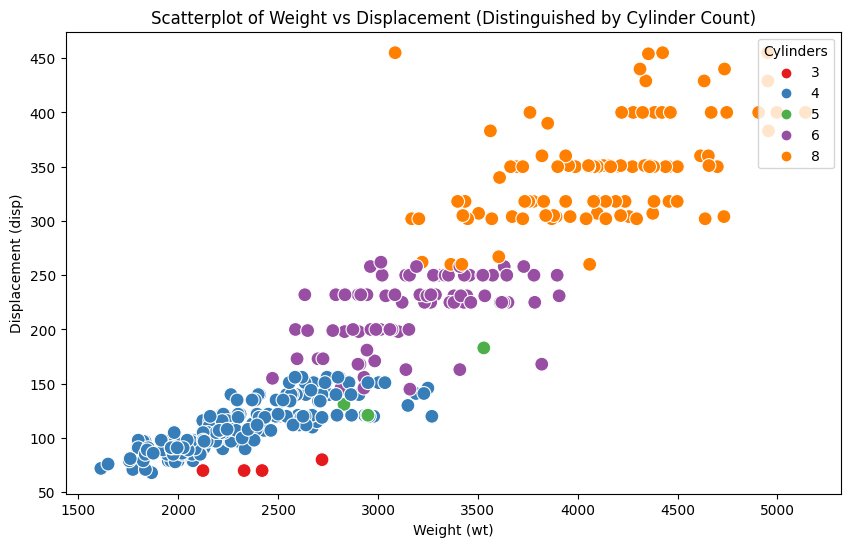

In [156]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='wt', y='disp', hue='cyl', palette='Set1', s=100)
plt.title('Scatterplot of Weight vs Displacement (Distinguished by Cylinder Count)')
plt.xlabel('Weight (wt)')
plt.ylabel('Displacement (disp)')

# Add a legend
plt.legend(title='Cylinders', loc='upper right')

# Show the plot
plt.show()

Part 1.2 e - Share insights for Q2.d.

The difference between displacement (disp) and weight (wt) becomes evident in their distinct but interconnected natures, as they tend to exhibit a positive correlation, indicating that when one increases, the other typically follows suit.

Cars equipped with 8 cylinders generally boast a greater weight profile compared to those with fewer cylinders, highlighting a trend where engine cylinder count plays a substantial role in determining a car's overall mass.

we can observe three distinct major clusters corresponding to cars with 8 cylinders, 6 cylinders, and 4 cylinders.

It appears that cars with 3 and 5 cylinders are relatively rare within the dataset, as there are only a limited number of data points representing these cylinder counts. This rarity could be indicative of less common or specialized engine configurations, which are not as prevalent in the general automotive market compared to the more common 4, 6, and 8-cylinder engines.


Part 1.2 f - Visualize a scatterplot for ‘wt’ and ’mpg’.
Datapoints should be distinguishable by ‘cyl’

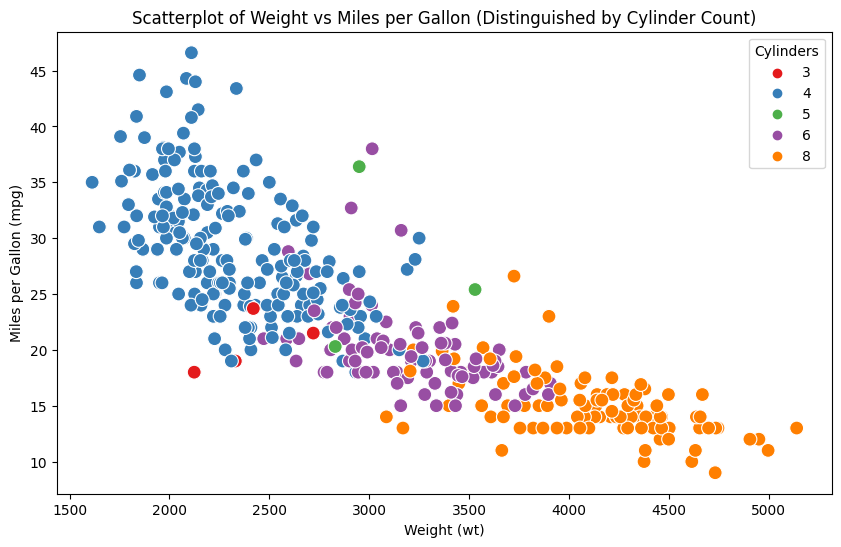

In [157]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='wt', y='mpg', hue='cyl', palette='Set1', s=100)
plt.title('Scatterplot of Weight vs Miles per Gallon (Distinguished by Cylinder Count)')
plt.xlabel('Weight (wt)')
plt.ylabel('Miles per Gallon (mpg)')

# Add a legend
plt.legend(title='Cylinders', loc='upper right')

# Show the plot
plt.show()

Part 1.2 g- Share insights for Q2.f

Weight and miles per gallon (mpg) exhibit a negative correlation, implying that as the weight of a vehicle increases, its fuel efficiency, measured in miles per gallon, tends to decrease.

The difference becomes evident when considering cars with 8 cylinders; they typically exhibit a higher weight profile, which in turn, often corresponds to a lower miles per gallon (mpg) rating, highlighting the trade-off between engine power and fuel efficiency in these vehicles.

Cars with 4 cylinders tend to be lighter and have better fuel efficiency (mpg) compared to cars with 6 or 8 cylinders.

Within our dataset, we've discerned three significant clusters, each corresponding to vehicles with 8, 6, and 4 cylinders. These clusters suggest that cars tend to group together based on their cylinder counts


It appears that there are only a limited number of data points available for cars with 5 and 6 cylinders in our dataset, indicating that these particular cylinder counts are less common compared to others.

Part 1.2 h - Check for unexpected values in all the
features and datapoints with such values.

In [158]:
for column in merged_df.columns:
    unique_values = merged_df[column].unique()
    print(f"Feature: {column}")
    print(f"Unique Values: {unique_values}")

Feature: car_name
Unique Values: ['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'ford pinto'
 'plymouth satellite custom' 'ford torino 500' 'amc matador'
 'pontiac catalina brougham' 'dodge monaco (sw)'
 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 't

In [136]:
hpIsDigit = pd.DataFrame(merged_df.hp.str.isdigit())

#print isDigit = False!
merged_df[hpIsDigit['hp'] == False]

car_name   mpg  cyl   disp hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0  ?  2046  19.0  71       1
126         ford maverick  21.0    6  200.0  ?  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0  ?  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0  ?  2905  14.3  80       1
354           renault 18i  34.5    4  100.0  ?  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0  ?  3035  20.5  82       1

In [164]:
merged_df = merged_df.replace('?', np.nan)
merged_df[hpIsDigit['hp'] == False]

car_name   mpg  cyl   disp  hp    wt   acc  yr  origin
32             ford pinto  25.0    4   98.0 NaN  2046  19.0  71       1
126         ford maverick  21.0    6  200.0 NaN  2875  17.0  74       1
330  renault lecar deluxe  40.9    4   85.0 NaN  1835  17.3  80       2
336    ford mustang cobra  23.6    4  140.0 NaN  2905  14.3  80       1
354           renault 18i  34.5    4  100.0 NaN  2320  15.8  81       2
374        amc concord dl  23.0    4  151.0 NaN  3035  20.5  82       1

In [165]:
print(merged_df.isna().any().any())

True


In [166]:
merged_df.median()


mpg         23.0
cyl          4.0
disp       148.5
hp          93.5
wt        2803.5
acc         15.5
yr          76.0
origin       1.0
dtype: float64

In [167]:
median_hp = merged_df['hp'].median()

# Fill NaN values in the 'hp' column with its median
merged_df['hp'].fillna(median_hp, inplace=True)


merged_df['hp'] = merged_df['hp'].astype('float64')  # converting the hp column from object / string type to float

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [168]:
print(merged_df.isna().any().any())


False


part 1.3 a - Apply K-Means clustering for 2 to 10
clusters

In [169]:
#dropping/ignoring car_name  and origin
car_actual_data = merged_df.drop(['car_name','origin'], axis=1)
car_actual_data.head()


mpg  cyl   disp     hp    wt   acc  yr
0  18.0    8  307.0  130.0  3504  12.0  70
1  15.0    8  350.0  165.0  3693  11.5  70
2  18.0    8  318.0  150.0  3436  11.0  70
3  16.0    8  304.0  150.0  3433  12.0  70
4  17.0    8  302.0  140.0  3449  10.5  70

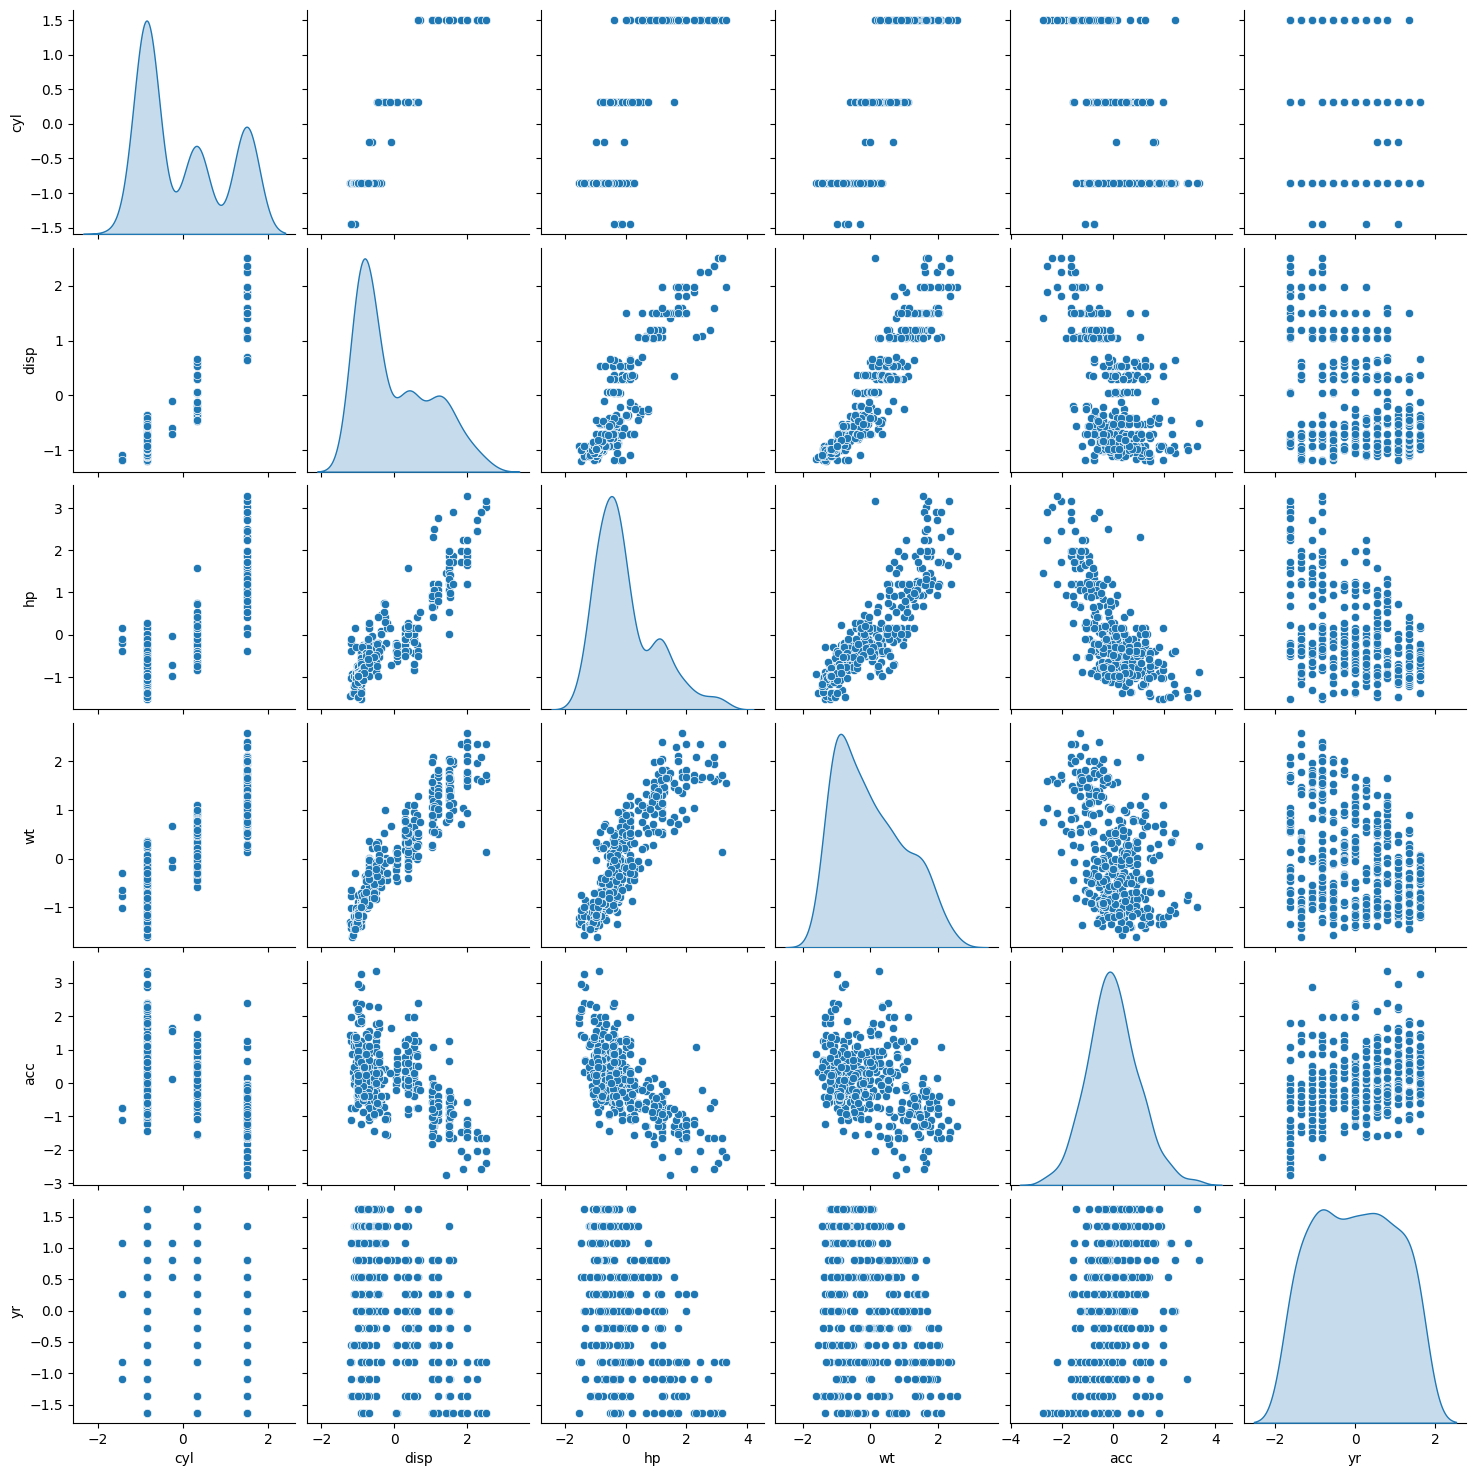

In [170]:
cardataAttr=car_actual_data.iloc[:,1:]
car_scaled_data=cardataAttr.apply(zscore)
sns.pairplot(car_scaled_data,diag_kind='kde')


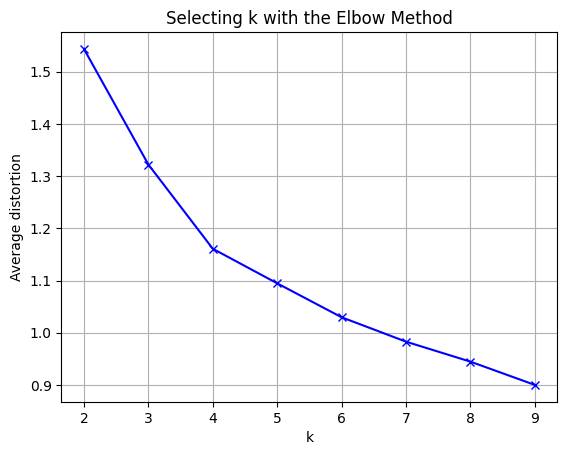

In [171]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(2,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(car_scaled_data)
    prediction=model.predict(car_scaled_data)
    meanDistortions.append(sum(np.min(cdist(car_scaled_data, model.cluster_centers_, 'euclidean'), axis=1)) / car_scaled_data.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.grid(True)


Part 1.3 c - On the above visual, highlight which are
the possible Elbow points.

Optimal Number of Clusters: 4 and 5 looks like optimal number of clusters and also lets consider 3 as we observed from pair plot there were 3 major clustors

Part 1.3 d - Train a K-means clustering model once
again on the optimal number of clusters and Part 1.3 e - Add a new feature in the DataFrame which
will have labels based upon cluster value

In [199]:
from sklearn.metrics import silhouette_samples, silhouette_score

final_model_4=KMeans(4)
final_model_4.fit(car_scaled_data)
prediction=final_model_4.predict(car_scaled_data)


#Append the prediction
car_actual_data["GROUP"] = prediction
car_scaled_data["GROUP"] = prediction
print("Groups Assigned : \n")
car_actual_data.head(5)




Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  GROUP
0  18.0    8  307.0  130.0  3504  12.0  70      1
1  15.0    8  350.0  165.0  3693  11.5  70      1
2  18.0    8  318.0  150.0  3436  11.0  70      1
3  16.0    8  304.0  150.0  3433  12.0  70      1
4  17.0    8  302.0  140.0  3449  10.5  70      1

In [191]:
car_data_clust = car_actual_data.groupby(['GROUP'])
car_data_clust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      25.511236  3.977528  105.589888   80.814607  2281.494382  16.606742   
1      31.759504  4.000000  111.925620   77.851240  2340.322314  16.508264   
2      14.528866  7.979381  348.020619  161.804124  4143.969072  12.641237   
3      20.176923  6.142857  222.912088  101.159341  3231.120879  16.421978   

              yr  
GROUP             
0      73.247191  
1      79.867769  
2      73.628866  
3      76.120879

array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>, <Axes: >,
        <Axes: >]], dtype=object)

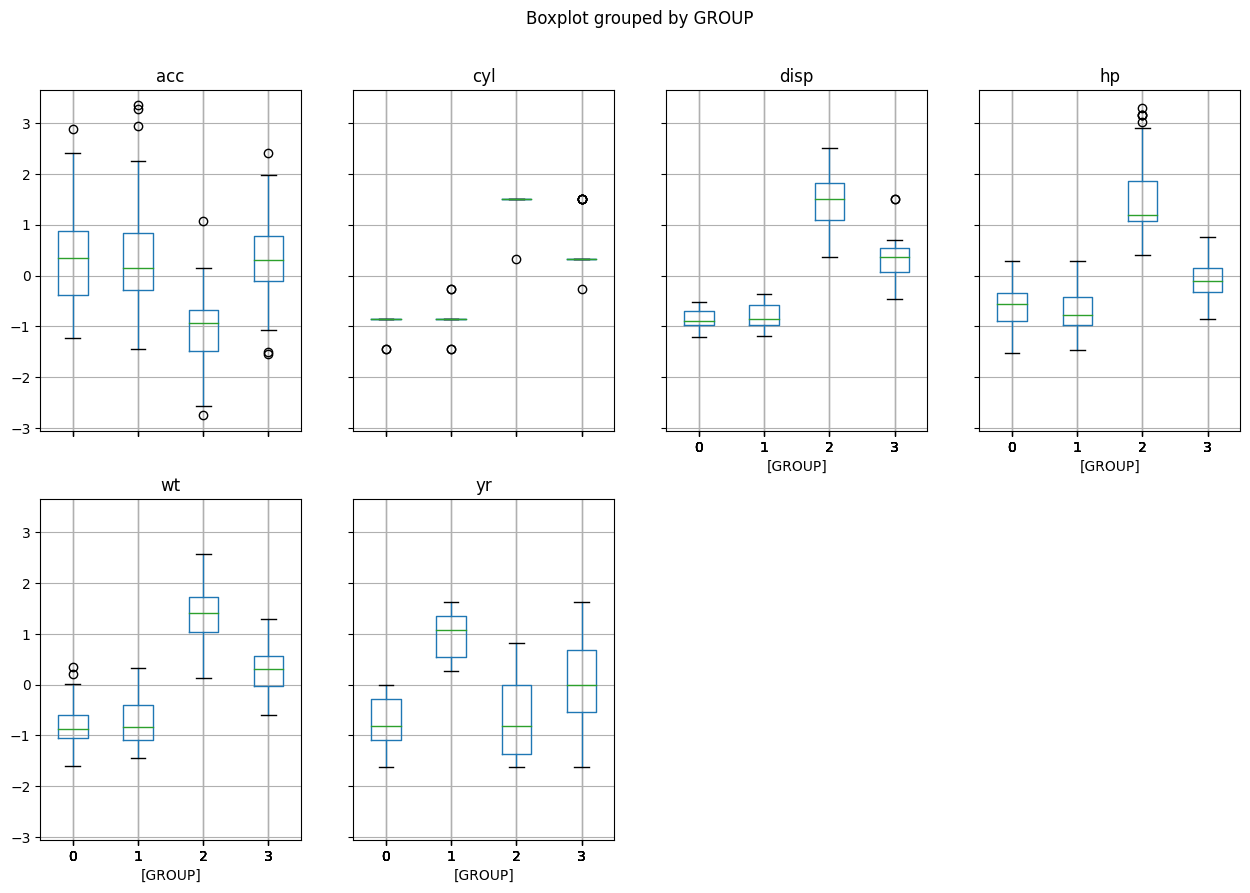

In [192]:
car_scaled_data.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))


In [193]:
final_model_5=KMeans(5)
final_model_5.fit(car_scaled_data)
prediction=final_model_5.predict(car_scaled_data)

#Append the prediction
car_actual_data["GROUP"] = prediction
car_scaled_data["GROUP"] = prediction
print("Groups Assigned : \n")
car_actual_data.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  GROUP
0  18.0    8  307.0  130.0  3504  12.0  70      2
1  15.0    8  350.0  165.0  3693  11.5  70      2
2  18.0    8  318.0  150.0  3436  11.0  70      2
3  16.0    8  304.0  150.0  3433  12.0  70      2
4  17.0    8  302.0  140.0  3449  10.5  70      2

In [194]:
car_data_clust = car_actual_data.groupby(['GROUP'])
car_data_clust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      32.369444  4.027778  107.055556   69.597222  2420.250000  19.994444   
1      20.176923  6.142857  222.912088  101.159341  3231.120879  16.421978   
2      14.528866  7.979381  348.020619  161.804124  4143.969072  12.641237   
3      25.588235  3.976471  105.852941   81.629412  2274.470588  16.332941   
4      31.158427  3.988764  113.359551   80.544944  2312.056180  15.364045   

              yr  
GROUP             
0      79.611111  
1      76.120879  
2      73.628866  
3      73.164706  
4      79.752809

array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>, <Axes: >,
        <Axes: >]], dtype=object)

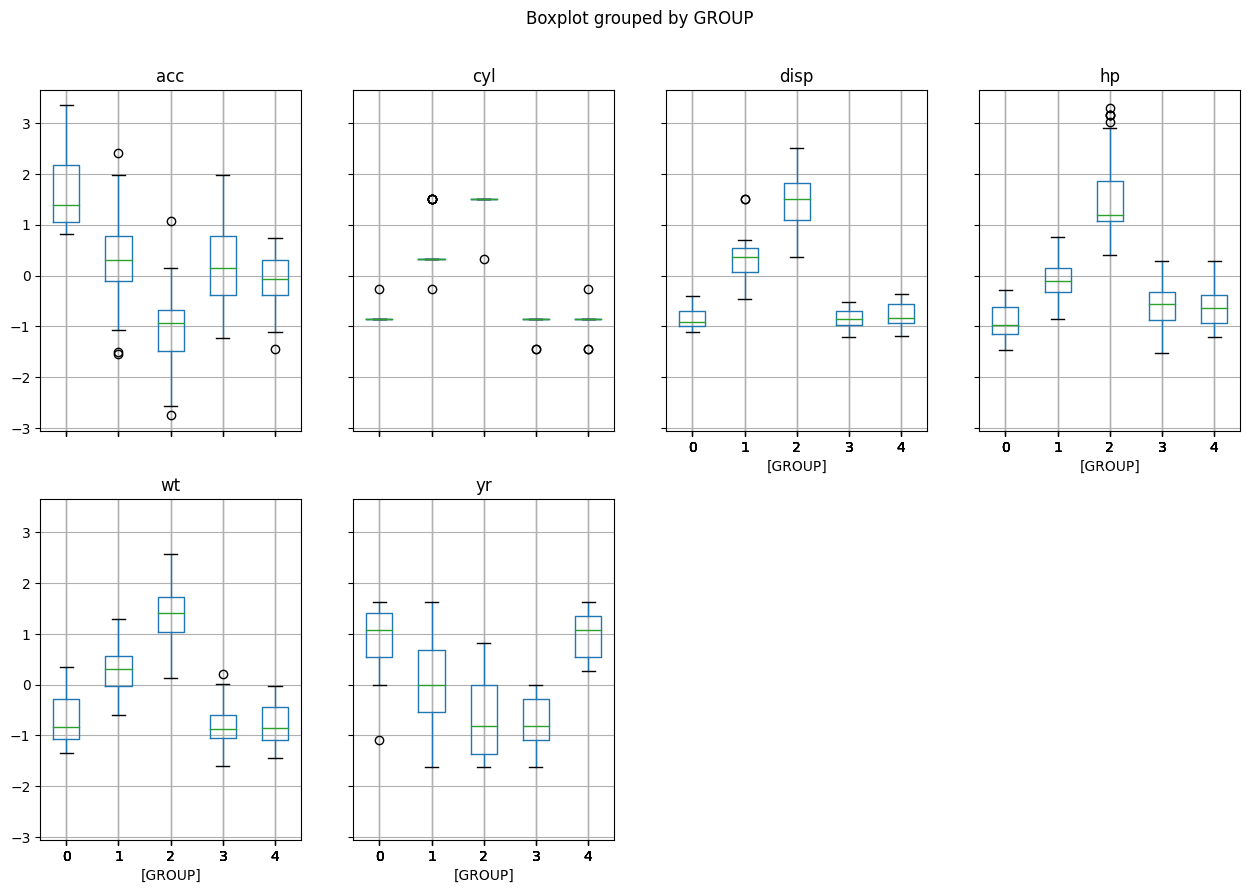

In [195]:
car_scaled_data.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

In [196]:
final_model_3=KMeans(3)
final_model_3.fit(car_scaled_data)
prediction=final_model_3.predict(car_scaled_data)

#Append the prediction
car_actual_data["GROUP"] = prediction
car_scaled_data["GROUP"] = prediction
print("Groups Assigned : \n")
car_actual_data.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  GROUP
0  18.0    8  307.0  130.0  3504  12.0  70      0
1  15.0    8  350.0  165.0  3693  11.5  70      0
2  18.0    8  318.0  150.0  3436  11.0  70      0
3  16.0    8  304.0  150.0  3433  12.0  70      0
4  17.0    8  302.0  140.0  3449  10.5  70      0

In [197]:
car_data_clust = car_actual_data.groupby(['GROUP'])
car_data_clust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      14.584694  7.979592  347.142857  161.275510  4134.551020  12.650000   
1      28.437356  3.982759  109.692529   81.074713  2293.695402  15.837356   
2      23.661905  5.523810  189.500000   92.071429  2999.523810  17.465873   

              yr  
GROUP             
0      73.642857  
1      76.534483  
2      77.126984

array([[<Axes: title={'center': 'acc'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'cyl'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'disp'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'hp'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'wt'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'yr'}, xlabel='[GROUP]'>, <Axes: >,
        <Axes: >]], dtype=object)

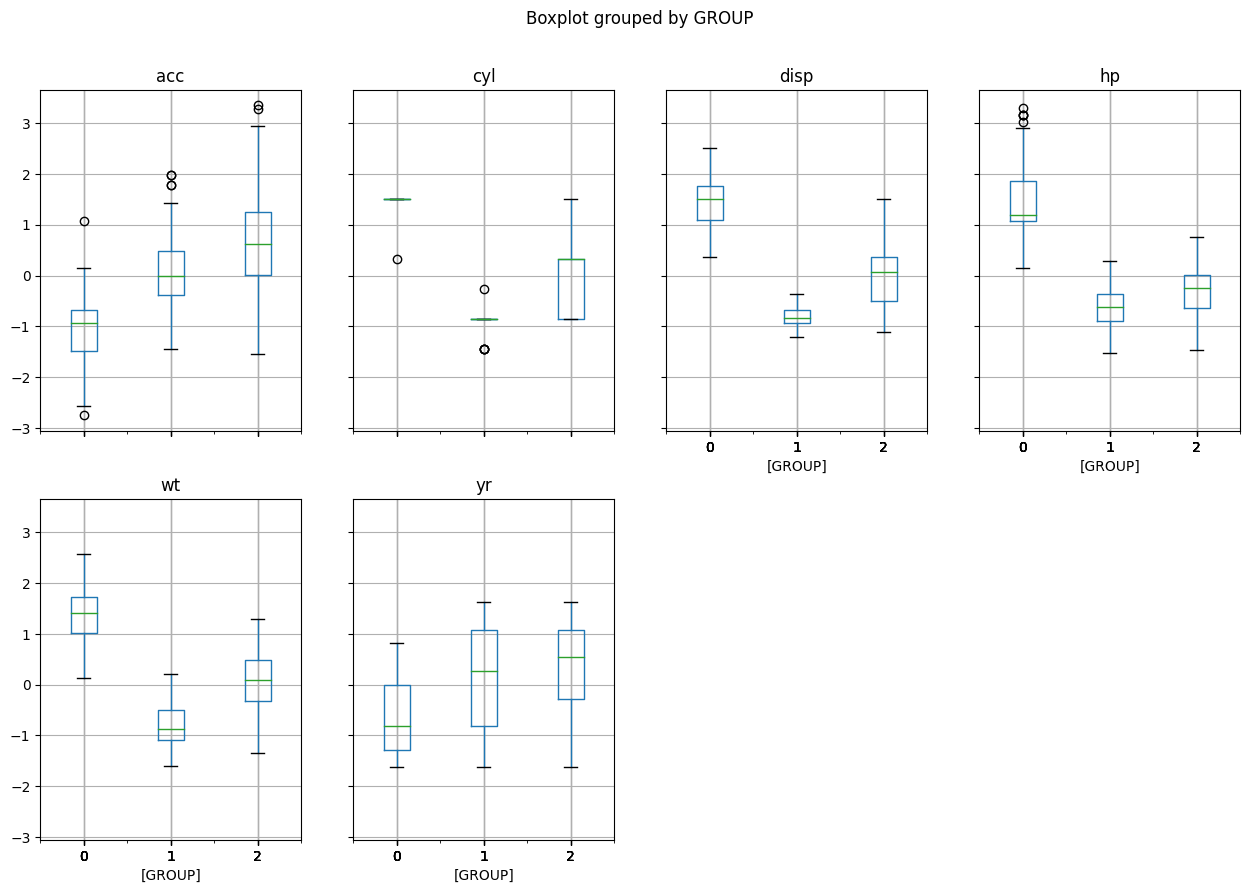

In [198]:
car_scaled_data.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))

Part 1.3 f -Plot a visual and color the datapoints based
upon clusters.

Lets consider Kmeans as 4

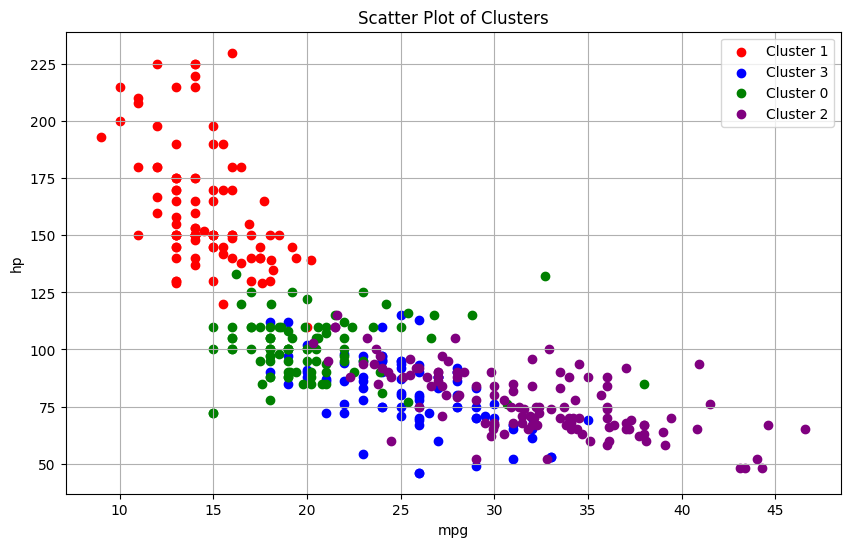

In [207]:
plt.figure(figsize=(10, 6))


colors = ['red', 'blue', 'green','purple']

for cluster_label, color in zip(car_actual_data['GROUP'].unique(), colors):
    cluster_data = car_actual_data[car_actual_data['GROUP'] == cluster_label]
    plt.scatter(cluster_data['mpg'], cluster_data['hp'], label=f'Cluster {cluster_label}', c=color)

plt.title('Scatter Plot of Clusters')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.legend()
plt.grid(True)
plt.show()

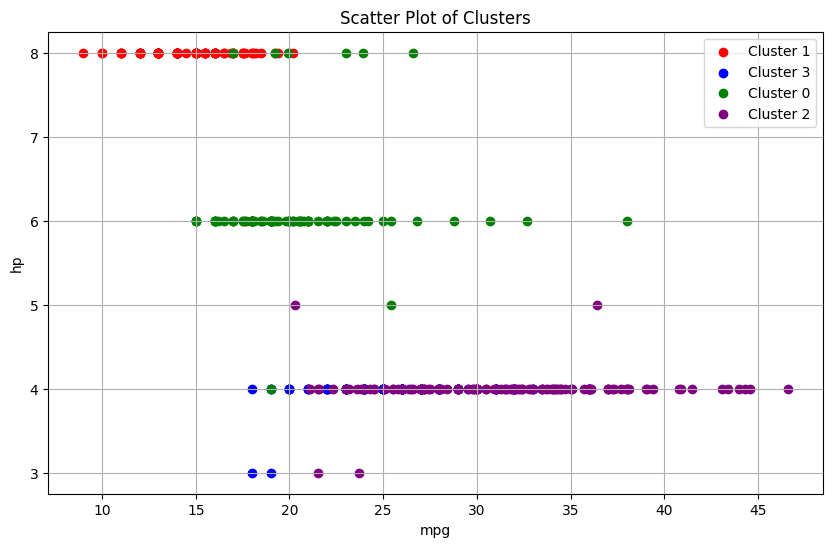

In [211]:
plt.figure(figsize=(10, 6))


colors = ['red', 'blue', 'green','purple']

for cluster_label, color in zip(car_actual_data['GROUP'].unique(), colors):
    cluster_data = car_actual_data[car_actual_data['GROUP'] == cluster_label]
    plt.scatter(cluster_data['mpg'], cluster_data['cyl'], label=f'Cluster {cluster_label}', c=color)

plt.title('Scatter Plot of Clusters')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.legend()
plt.grid(True)
plt.show()

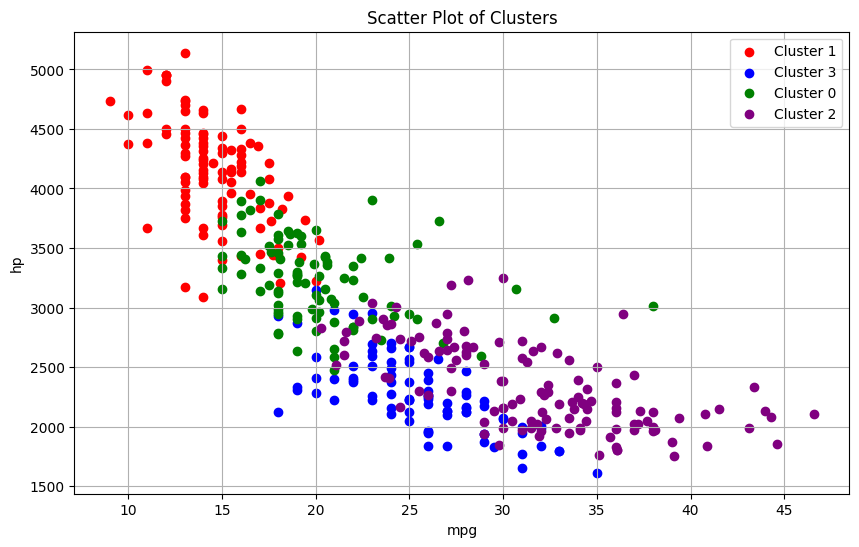

In [210]:
plt.figure(figsize=(10, 6))


colors = ['red', 'blue', 'green','purple']

for cluster_label, color in zip(car_actual_data['GROUP'].unique(), colors):
    cluster_data = car_actual_data[car_actual_data['GROUP'] == cluster_label]
    plt.scatter(cluster_data['mpg'], cluster_data['wt'], label=f'Cluster {cluster_label}', c=color)

plt.title('Scatter Plot of Clusters')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.legend()
plt.grid(True)
plt.show()

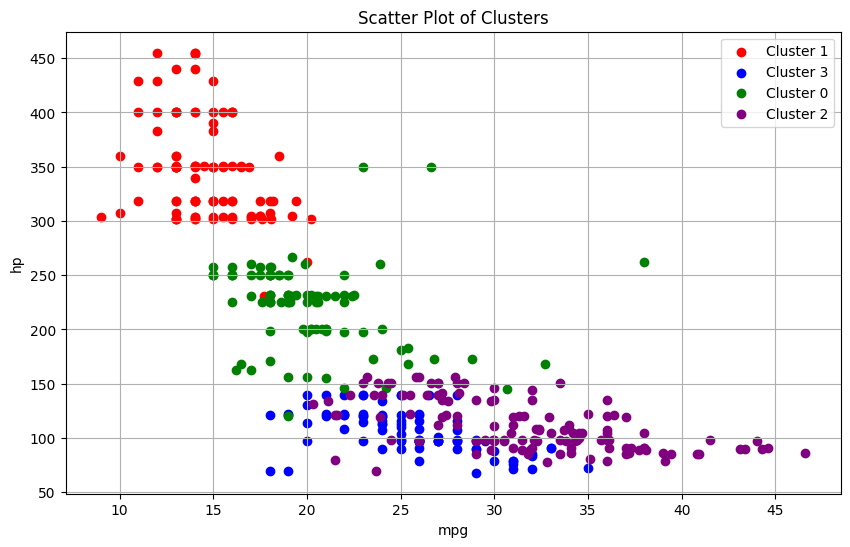

In [209]:
plt.figure(figsize=(10, 6))

colors = ['red', 'blue', 'green','purple']
for cluster_label, color in zip(car_actual_data['GROUP'].unique(), colors):
    cluster_data = car_actual_data[car_actual_data['GROUP'] == cluster_label]
    plt.scatter(cluster_data['mpg'], cluster_data['disp'], label=f'Cluster {cluster_label}', c=color)

plt.title('Scatter Plot of Clusters')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.legend()
plt.grid(True)
plt.show()

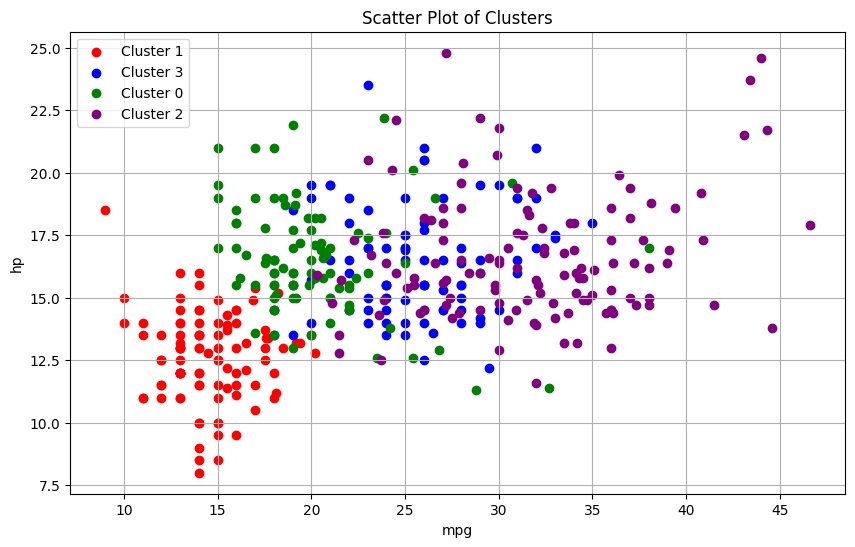

In [208]:
plt.figure(figsize=(10, 6))


colors = ['red', 'blue', 'green','purple']

for cluster_label, color in zip(car_actual_data['GROUP'].unique(), colors):
    cluster_data = car_actual_data[car_actual_data['GROUP'] == cluster_label]
    plt.scatter(cluster_data['mpg'], cluster_data['acc'], label=f'Cluster {cluster_label}', c=color)

plt.title('Scatter Plot of Clusters')
plt.xlabel('mpg')
plt.ylabel('hp')
plt.legend()
plt.grid(True)
plt.show()

Part 1.3 g - Pass a new DataPoint and predict which
cluster it belongs to.

In [216]:
new_data_point = np.array([18.0, 8, 307.0, 130.0, 3504, 12.0, 70])

# Predict the cluster for the new data point
predicted_cluster = final_model_3.predict([new_data_point])
print(f"For Kmeans =3 The new data point belongs to Cluster  {predicted_cluster[0]}")

predicted_cluster = final_model_4.predict([new_data_point])
print(f"For KMeans=4 The new data point belongs to Cluster {predicted_cluster[0]}")

predicted_cluster = final_model_5.predict([new_data_point])
print(f"For Kmeans=5 The new data point belongs to Cluster {predicted_cluster[0]}")


For Kmeans =3 The new data point belongs to Cluster  2
For KMeans=4 The new data point belongs to Cluster 0
For Kmeans=5 The new data point belongs to Cluster 0


Part 2. 1 a - Read ‘vehicle.csv’ and save as
DataFrame.

In [217]:
vehicle_data=pd.read_csv('/content/drive/MyDrive/Python Course/vehicle.csv')

Part 2.1 b- Check percentage of missing values and
impute with correct approach.

In [218]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [219]:
missing_values = vehicle_data.isna().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / len(vehicle_data)) * 100

# Create a DataFrame to display the results
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Filter columns with missing values

# Display the columns with missing values and their percentages
print(missing_data)

                             Missing Values  Percentage
circularity                               5    0.591017
distance_circularity                      4    0.472813
radius_ratio                              6    0.709220
pr.axis_aspect_ratio                      2    0.236407
scatter_ratio                             1    0.118203
elongatedness                             1    0.118203
pr.axis_rectangularity                    3    0.354610
scaled_variance                           3    0.354610
scaled_variance.1                         2    0.236407
scaled_radius_of_gyration                 2    0.236407
scaled_radius_of_gyration.1               4    0.472813
skewness_about                            6    0.709220
skewness_about.1                          1    0.118203
skewness_about.2                          1    0.118203


In [220]:
vehicle_data.median()


compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [221]:
print(vehicle_data.isnull().any().any())

True


In [222]:
vehicle_data['circularity'].fillna(vehicle_data['circularity'].median(), inplace=True)
vehicle_data['distance_circularity'].fillna(vehicle_data['distance_circularity'].median(), inplace=True)
vehicle_data['radius_ratio'].fillna(vehicle_data['radius_ratio'].median(), inplace=True)
vehicle_data['pr.axis_aspect_ratio'].fillna(vehicle_data['pr.axis_aspect_ratio'].median(), inplace=True)
vehicle_data['scatter_ratio'].fillna(vehicle_data['scatter_ratio'].median(), inplace=True)
vehicle_data['elongatedness'].fillna(vehicle_data['elongatedness'].median(), inplace=True)
vehicle_data['pr.axis_rectangularity'].fillna(vehicle_data['pr.axis_rectangularity'].median(), inplace=True)
vehicle_data['scaled_variance'].fillna(vehicle_data['scaled_variance'].median(), inplace=True)
vehicle_data['scaled_variance.1'].fillna(vehicle_data['scaled_variance.1'].median(), inplace=True)
vehicle_data['scaled_radius_of_gyration'].fillna(vehicle_data['scaled_radius_of_gyration'].median(), inplace=True)
vehicle_data['scaled_radius_of_gyration.1'].fillna(vehicle_data['scaled_radius_of_gyration.1'].median(), inplace=True)
vehicle_data['skewness_about'].fillna(vehicle_data['skewness_about'].median(), inplace=True)
vehicle_data['skewness_about.2'].fillna(vehicle_data['skewness_about.2'].median(), inplace=True)
vehicle_data['skewness_about.1'].fillna(vehicle_data['skewness_about.1'].median(), inplace=True)

In [223]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [224]:
vehicle_data.describe(include='all').T

count unique  top freq        mean         std  \
compactness                  846.0    NaN  NaN  NaN   93.678487    8.234474   
circularity                  846.0    NaN  NaN  NaN   44.823877    6.134272   
distance_circularity         846.0    NaN  NaN  NaN   82.100473   15.741569   
radius_ratio                 846.0    NaN  NaN  NaN  168.874704   33.401356   
pr.axis_aspect_ratio         846.0    NaN  NaN  NaN   61.677305    7.882188   
max.length_aspect_ratio      846.0    NaN  NaN  NaN    8.567376    4.601217   
scatter_ratio                846.0    NaN  NaN  NaN  168.887707    33.19771   
elongatedness                846.0    NaN  NaN  NaN    40.93617    7.811882   
pr.axis_rectangularity       846.0    NaN  NaN  NaN   20.580378    2.588558   
max.length_rectangularity    846.0    NaN  NaN  NaN  147.998818   14.515652   
scaled_variance              846.0    NaN  NaN  NaN  188.596927   31.360427   
scaled_variance.1            846.0    NaN  NaN  NaN  439.314421  176.496341   
scaled_radius_of_gyration    846.0    NaN  NaN  NaN  174.706856   32.546277   
scaled_radius_of_gyration.1  846.0    NaN  NaN  NaN   72.443262    7.468734   
skewness_about               846.0    NaN  NaN  NaN    6.361702    4.903244   
skewness_about.1             846.0    NaN  NaN  NaN   12.600473    8.930962   
skewness_about.2             846.0    NaN  NaN  NaN   188.91844    6.152247   
hollows_ratio                846.0    NaN  NaN  NaN  195.632388    7.438797   
class                          846      3  car  429         NaN         NaN   

                               min     25%    50%     75%     max  
compactness                   73.0    87.0   93.0   100.0   119.0  
circularity                   33.0    40.0   44.0    49.0    59.0  
distance_circularity          40.0    70.0   80.0    98.0   112.0  
radius_ratio                 104.0   141.0  167.0   195.0   333.0  
pr.axis_aspect_ratio          47.0    57.0   61.0    65.0   138.0  
max.length_aspect_ratio        2.0     7.0    8.0    10.0    55.0  
scatter_ratio                112.0   147.0  157.0   198.0   265.0  
elongatedness                 26.0    33.0   43.0    46.0    61.0  
pr.axis_rectangularity        17.0    19.0   20.0    23.0    29.0  
max.length_rectangularity    118.0   137.0  146.0   159.0   188.0  
scaled_variance              130.0   167.0  179.0   217.0   320.0  
scaled_variance.1            184.0  318.25  363.5  586.75  1018.0  
scaled_radius_of_gyration    109.0   149.0  173.5   198.0   268.0  
scaled_radius_of_gyration.1   59.0    67.0   71.5    75.0   135.0  
skewness_about                 0.0     2.0    6.0     9.0    22.0  
skewness_about.1               0.0     5.0   11.0    19.0    41.0  
skewness_about.2             176.0   184.0  188.0   193.0   206.0  
hollows_ratio                181.0  190.25  197.0   201.0   211.0  
class                          NaN     NaN    NaN     NaN     NaN

In [225]:
print(vehicle_data.isnull().any().any())


False


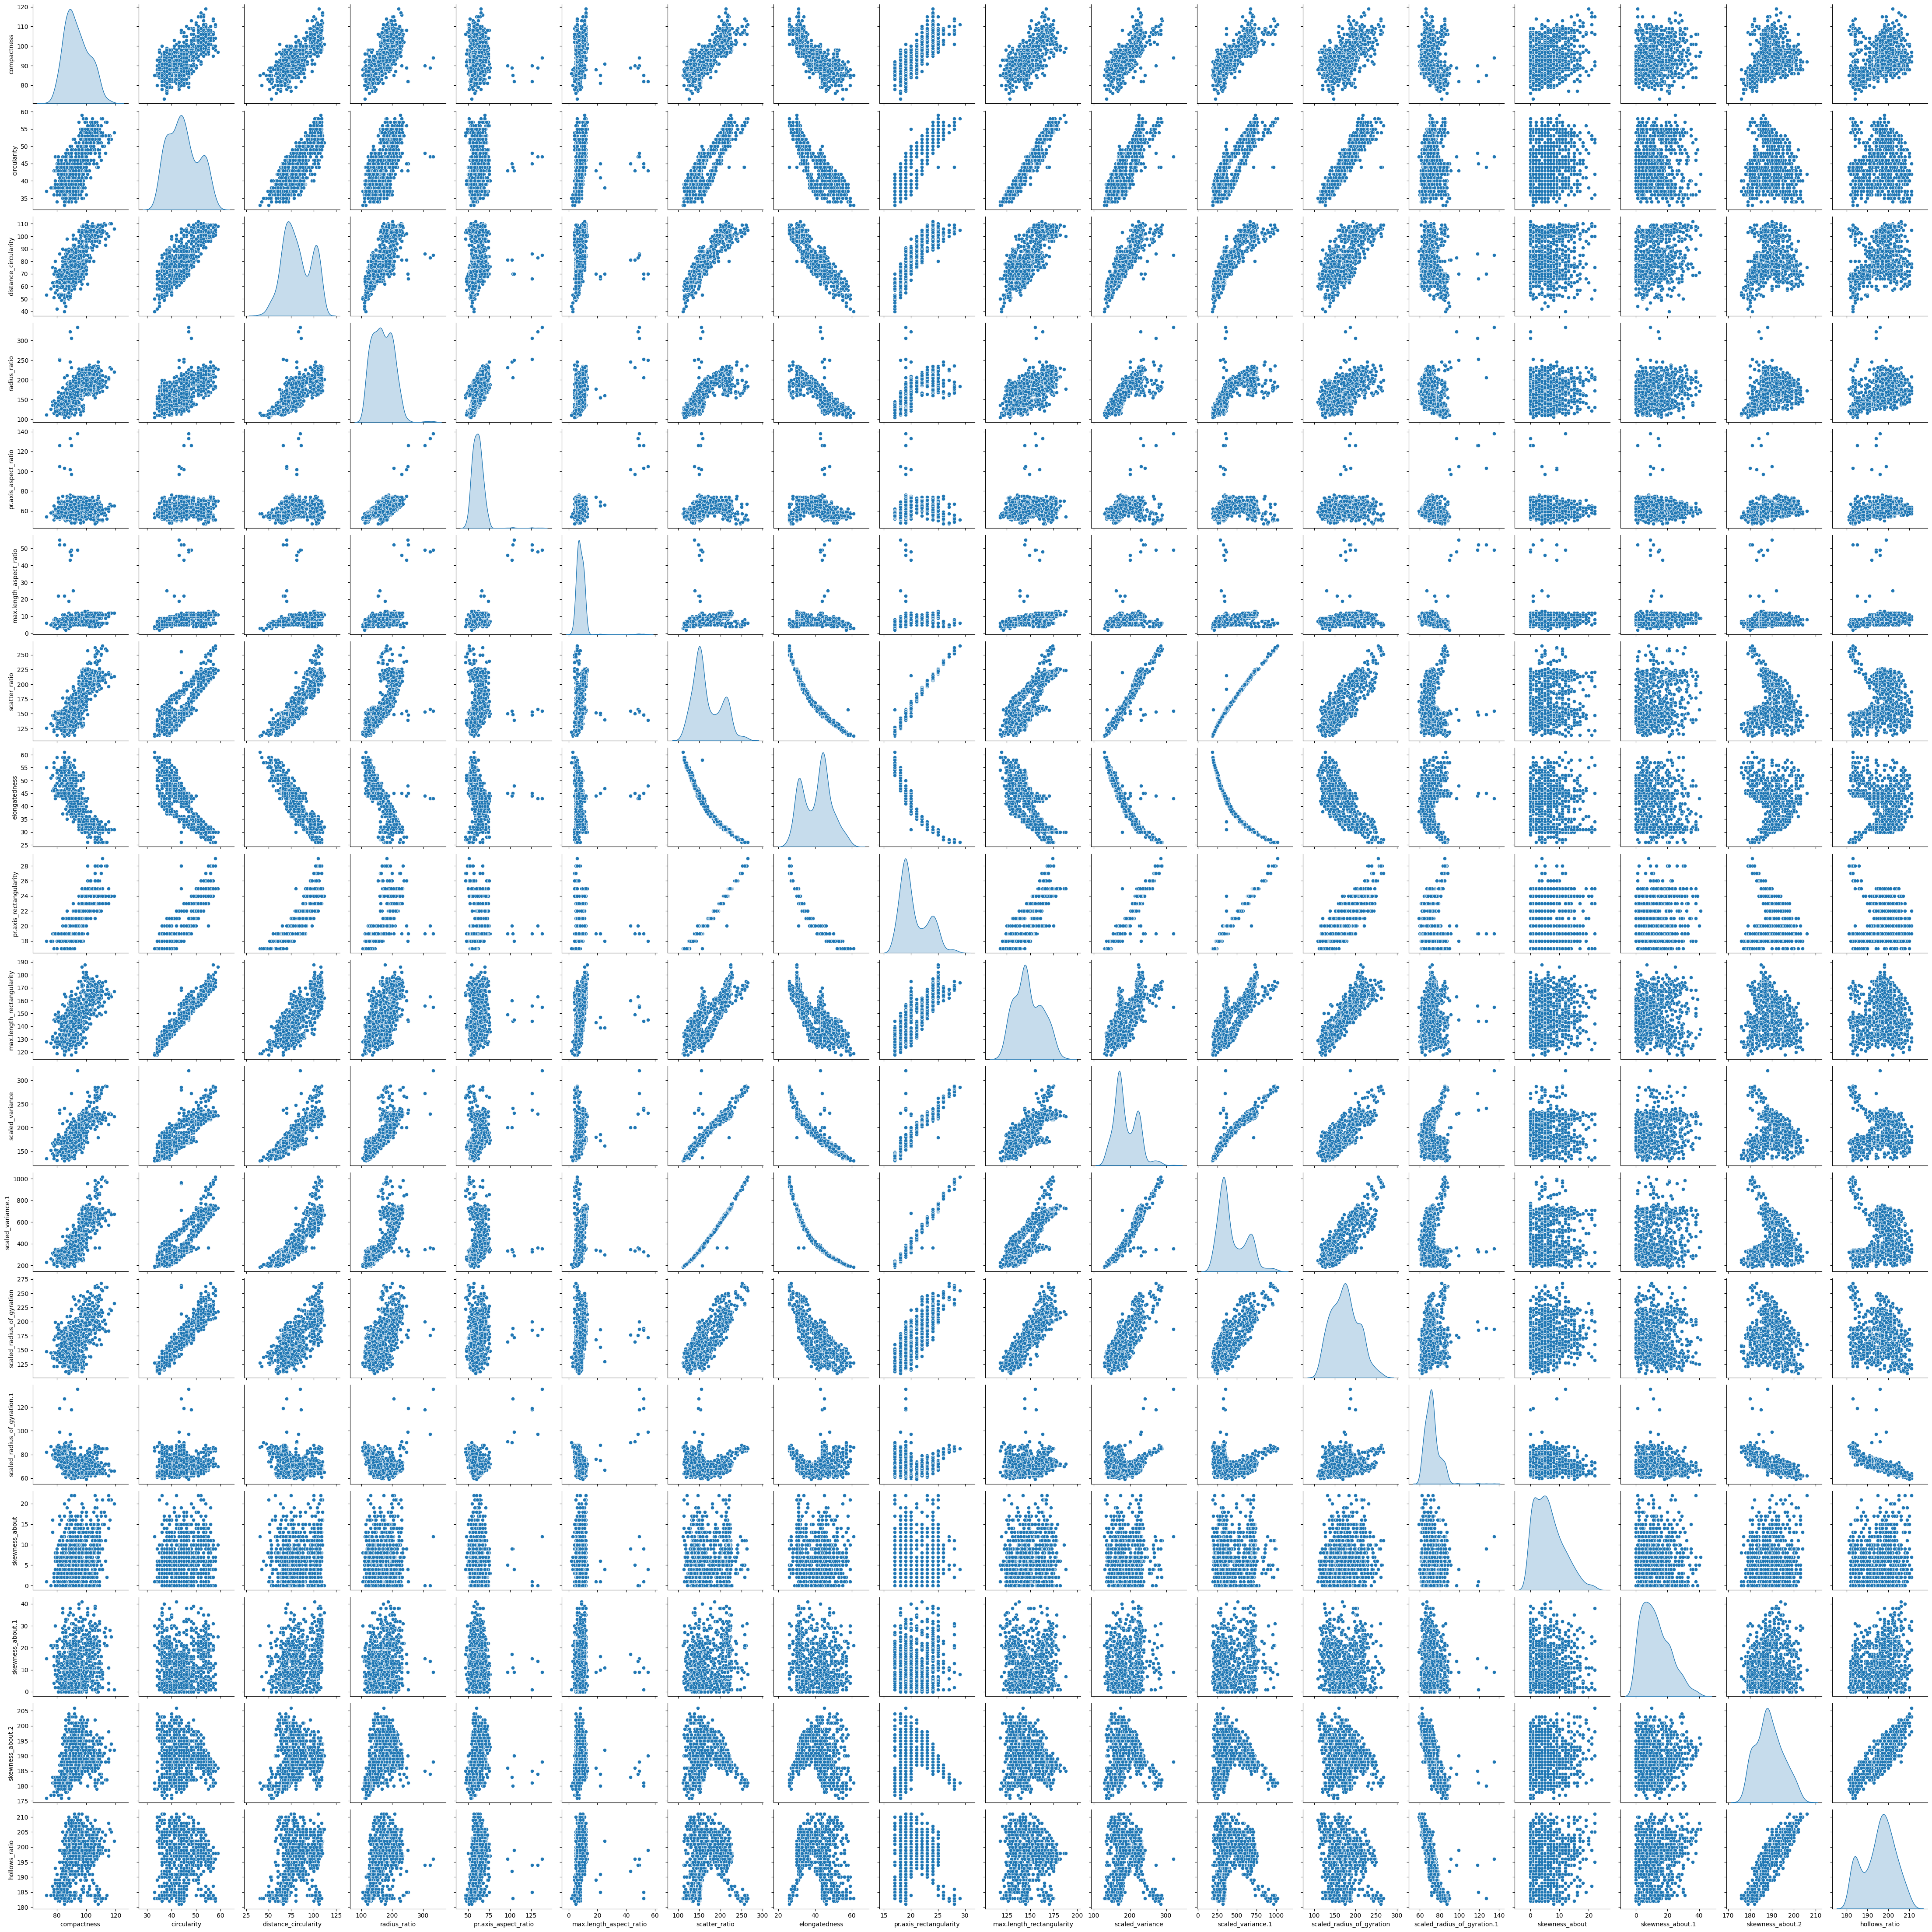

In [226]:
sns.pairplot(vehicle_data,diag_kind='kde')


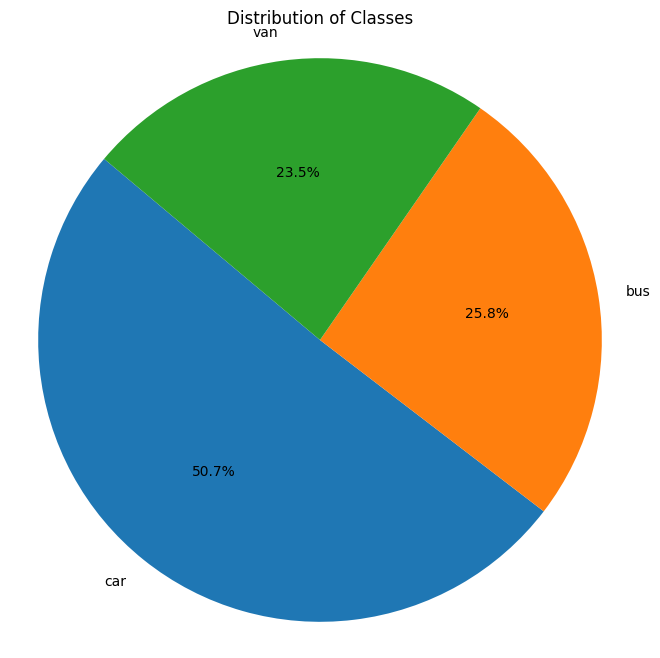

car: 50.7%
bus: 25.8%
van: 23.5%


In [227]:
class_counts = vehicle_data['class'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Classes')
plt.axis('equal')


plt.show()


for class_label, count in zip(class_counts.index, class_counts.values):
    percentage = (count / len(vehicle_data)) * 100
    print(f'{class_label}: {percentage:.1f}%')

Part 2.1 d - Check for duplicate rows in the data and
impute with correct approach.

In [228]:
duplicate_rows = vehicle_data[vehicle_data.duplicated()]


if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No Duplicate Rows Found")

No Duplicate Rows Found


In [231]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

art 2.2 b - Standardize the Data.

In [238]:
from sklearn.preprocessing import StandardScaler

numeric_columns = vehicle_data.select_dtypes(include=['number']).columns


scaler = StandardScaler()


vehicle_data[numeric_columns] = scaler.fit_transform(vehicle_data[numeric_columns])


Part 2.2 a - Split data into X and Y.

In [239]:
X = vehicle_data.drop(columns=['class'])  # Exclude the 'class' column
Y = vehicle_data['class']

In [240]:
Y.value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [241]:
vehicle_data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.273363   
1    -0.325470    -0.623732              0.120741     -0.835032   
2     1.254193     0.844303              1.519141      1.202018   
3    -0.082445    -0.623732             -0.006386     -0.295813   
4    -1.054545    -0.134387             -0.769150      1.082192   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              1.310398                 0.311542      -0.207598   
1             -0.593753                 0.094079      -0.599423   
2              0.548738                 0.311542       1.148719   
3              0.167907                 0.094079      -0.750125   
4              5.245643                 9.444962      -0.599423   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.401920          -0.341934                   0.285705   
1        -0.593357          -0.619724                  -0.513630   
2         1.097671           1.109379                   1.392477   
3        -0.912419          -0.738777                  -1.466683   
4         1.671982          -0.648070                   0.408680   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.327326       -0.073812          0.380870   
1                    -0.059384        0.538390          0.156798   
2                     0.074587        1.558727         -0.403383   
3                    -1.265121       -0.073812         -0.291347   
4                     7.309005        0.538390         -0.179311   

   skewness_about.2  hollows_ratio class  
0         -0.312012       0.183957   van  
1          0.013265       0.452977   van  
2         -0.149374       0.049447   car  
3          1.639649       1.529056   van  
4         -1.450481      -1.699181   bus

Part 2.3 a - Train a base Classification model using
SVM.

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


svm_classifier = SVC()


svm_classifier.fit(X_train, Y_train)

Y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)


print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{confusion}')
print('Classification Report:\n', classification_rep)

Accuracy: 0.96
Confusion Matrix:
[[49  2  1]
 [ 0 76  2]
 [ 0  1 39]]
Classification Report:
               precision    recall  f1-score   support

         bus       1.00      0.94      0.97        52
         car       0.96      0.97      0.97        78
         van       0.93      0.97      0.95        40

    accuracy                           0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.97      0.96      0.96       170



Part 2.3 b - Print Classification metrics for train datas


In [246]:
Y_train_pred = svm_classifier.predict(X_train)


accuracy_train = accuracy_score(Y_train, Y_train_pred)
confusion_train = confusion_matrix(Y_train, Y_train_pred)
classification_rep_train = classification_report(Y_train, Y_train_pred)


print(f'Train Accuracy: {accuracy_train:.2f}')
print(f'Train Confusion Matrix:\n{confusion_train}')
print('Train Classification Report:\n', classification_rep_train)

Train Accuracy: 0.98
Train Confusion Matrix:
[[162   0   4]
 [  2 343   6]
 [  1   1 157]]
Train Classification Report:
               precision    recall  f1-score   support

         bus       0.98      0.98      0.98       166
         car       1.00      0.98      0.99       351
         van       0.94      0.99      0.96       159

    accuracy                           0.98       676
   macro avg       0.97      0.98      0.98       676
weighted avg       0.98      0.98      0.98       676



In [249]:
numeric_columns = vehicle_data.select_dtypes(include=['number']).columns

X_scaled = vehicle_data[numeric_columns]
covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

Part 2.3 c - Apply PCA on the data with 10
components

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



X_scaled = vehicle_data[numeric_columns]


# Initialize PCA with 10 components
pca = PCA(n_components=10)

# Fit PCA on the scaled data and transform it
X_pca = pca.fit_transform(X_scaled)


In [301]:
print(pca.explained_variance_)

[9.40460261 3.01492206 1.90352502 1.17993747 0.91726063 0.53999263
 0.35887012 0.22193246 0.1606086  0.09185722]


In [302]:
print(pca.components_)


[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

Part 2.3 d - Visualize Cumulative Variance Explained
with Number of Components.

In [303]:
print(pca.explained_variance_ratio_)


[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366 0.01231501 0.00891215 0.00509715]


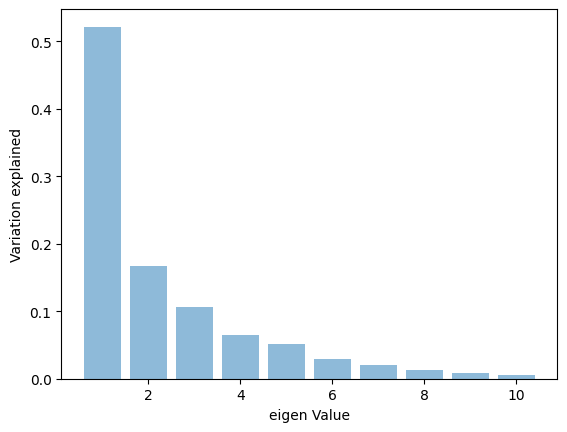

In [292]:
plt.bar(list(range(1,11)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

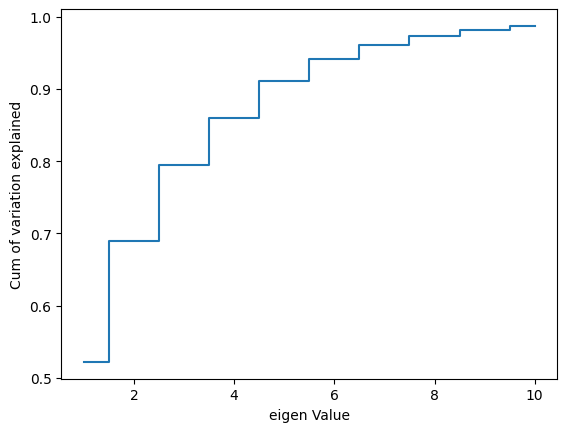

In [293]:
plt.step(list(range(1,11)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

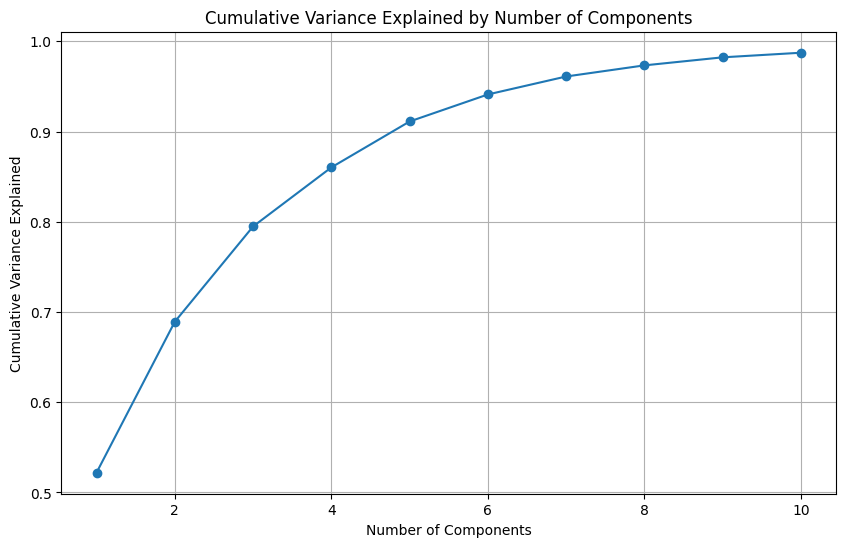

In [294]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)


plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Cumulative Variance Explained by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid()
plt.show()

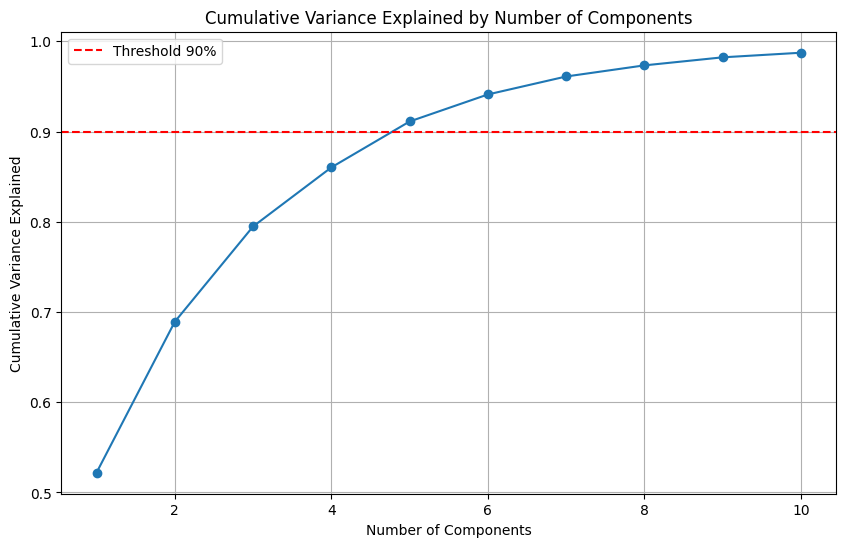

In [304]:

fig, ax = plt.subplots(figsize=(10, 6))
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
ax.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
ax.set_title('Cumulative Variance Explained by Number of Components')
ax.set_xlabel('Number of Components')
ax.set_ylabel('Cumulative Variance Explained')
ax.grid()


threshold = 0.90
ax.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold {threshold:.0%}')


ax.legend()

plt.show()

Part 2.3 f - Apply PCA on the data. This time Select
Minimum Components with 90% or above variance
explained.

In [305]:


cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()


n_components = (cumulative_variance_ratio >= 0.90).sum() + 1

pca = PCA(n_components=n_components)


X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)

print(pca.components_)
print(n_components)


[0.52186034 0.16729768 0.10562639 0.0654746  0.05089869 0.02996413
 0.01991366]
[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87


Part 2.3 g - Train SVM model on components selected
from above step.

In [306]:
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = svm_classifier.predict(X_test)

# Calculate accuracy and other classification metrics
accuracy = accuracy_score(Y_test, Y_pred)
confusion = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Print the classification metrics
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.85
Confusion Matrix:
[[42  9  1]
 [10 66  2]
 [ 3  1 36]]
Classification Report:
              precision    recall  f1-score   support

         bus       0.76      0.81      0.79        52
         car       0.87      0.85      0.86        78
         van       0.92      0.90      0.91        40

    accuracy                           0.85       170
   macro avg       0.85      0.85      0.85       170
weighted avg       0.85      0.85      0.85       170



Part 2.3 h - Print Classification metrics for train data of
above model and share insights.

In [307]:
Y_train_pred = svm_classifier.predict(X_train)

# Calculate accuracy and other classification metrics for training data
accuracy_train = accuracy_score(Y_train, Y_train_pred)
confusion_train = confusion_matrix(Y_train, Y_train_pred)
classification_rep_train = classification_report(Y_train, Y_train_pred)

# Print the classification metrics for training data
print(f'Training Data - Accuracy: {accuracy_train:.2f}')
print('Training Data - Confusion Matrix:')
print(confusion_train)
print('Training Data - Classification Report:')
print(classification_rep_train)

Training Data - Accuracy: 0.81
Training Data - Confusion Matrix:
[[116  43   7]
 [ 42 290  19]
 [ 10   9 140]]
Training Data - Classification Report:
              precision    recall  f1-score   support

         bus       0.69      0.70      0.69       166
         car       0.85      0.83      0.84       351
         van       0.84      0.88      0.86       159

    accuracy                           0.81       676
   macro avg       0.79      0.80      0.80       676
weighted avg       0.81      0.81      0.81       676




There is no significant difference found between train and test data for model without applying PCA and threshold,achieved good accuracy after applying PCA with threshold 0.90 accuracy reduced to 0.81, we cannot say that overfitting is reduced here because its important to note that test and train data accuracy almost similar for model before applying PCA, we can further analyze and optmize using hyper tuning params

Part 2.4 a - Train another SVM on the components out
of PCA. Tune the parameters to improve performance.

In [324]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

numeric_columns = vehicle_data.select_dtypes(include=['number']).columns

X_scaled = vehicle_data[numeric_columns]


Y = vehicle_data['class']

pca = PCA(n_components=0.90)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=12)

svm = SVC()


svm.fit(X_train, y_train)

param_grid = {
    'C': [10, 100, 1000],
    'kernel': ['linear','rbf'],
    'gamma': [0.1, 0.01,0.0001]
}

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_svm = grid_search.best_estimator_



Part 2.4 b- Share best Parameters observed from
above step.

In [325]:
# View the accuracy score
print('Best score for data:', grid_search.best_score_)

# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C)
print('Best Kernel:',grid_search.best_estimator_.kernel)
print('Best Gamma:',grid_search.best_estimator_.gamma)

Best score for data: 0.816557734204793
Best C: 10
Best Kernel: rbf
Best Gamma: 0.1


Part 2.4 c- Print Classification metrics for train data of
above model and share relative improvement in
performance in all the models along with insights.

In [328]:
y_train_pred = best_svm.predict(X_train)


train_accuracy = accuracy_score(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Print the classification metrics for the train data
print("Train Accuracy:", train_accuracy)
print("Train Classification Report:\n", train_classification_report)


y_test_pred = best_svm.predict(X_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the classification metrics for the train data
print("Test Accuracy:", test_accuracy)
print("Test Classification Report:\n", test_classification_report)

Train Accuracy: 0.886094674556213
Train Classification Report:
               precision    recall  f1-score   support

         bus       0.91      0.80      0.85       174
         car       0.90      0.94      0.92       341
         van       0.83      0.86      0.84       161

    accuracy                           0.89       676
   macro avg       0.88      0.87      0.87       676
weighted avg       0.89      0.89      0.89       676

Test Accuracy: 0.8411764705882353
Test Classification Report:
               precision    recall  f1-score   support

         bus       0.91      0.73      0.81        44
         car       0.86      0.90      0.88        88
         van       0.74      0.84      0.79        38

    accuracy                           0.84       170
   macro avg       0.84      0.82      0.83       170
weighted avg       0.85      0.84      0.84       170



Train accuracy with PCA component reduced to 0.90 threshold and without tuning was 81% and with PCA component reduced to 0.90 threshold and with tuning performed well with  accuracy 88%

The model for which PCA is not applied is  performed better than other but final modified model had the capability to explain 90% of data with just 7 variabes(ncomponent obtained(6)+1)


art 2.5 a - Explain pre-requisite/assumptions of PCA.

Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in data analysis and machine learning. To understand and use PCA effectively, we should be aware of its prerequisites and assumptions:

**1. Linearity:** PCA assumes that the data follows a linear relationship between variables. In other words, it assumes that the relationships between variables can be represented by linear combinations of the original features.

**2. Numerical Data:** PCA works best with numerical data. It is not suitable for categorical data unless you convert categorical variables into numerical format (e.g., one-hot encoding).

**3. Standardization or Scaling:** PCA is sensitive to the scale of the data. It is recommended to standardize or scale the data so that each feature has a mean of 0 and a standard deviation of 1. Standardization helps ensure that features with larger scales do not dominate the analysis.

**4. Mean-Centered Data:** PCA assumes that the data is mean-centered, meaning that the mean of each feature is subtracted from the data. Centering the data helps remove translation as a source of variance.

**5. High Variance Features:** PCA assumes that the high-variance features contain the most important information. Features with low variance may be considered uninformative and may not contribute significantly to the principal components.

**6. Orthogonal Principal Components:** PCA assumes that the principal components (new axes) are orthogonal to each other, meaning they are uncorrelated. This allows PCA to capture the maximum amount of variance in the data.

**7. Normality:** While PCA does not strictly require that the data be normally distributed, it can benefit from normality. If your data is highly non-normal, you may consider using alternative techniques or transformations.

**8. Number of Samples > Number of Features:** For PCA to work effectively, the number of data samples (observations) should be greater than the number of features (variables). Having more samples than features ensures that there is enough information to extract meaningful principal components.

**9. Linear Combination of Variables:** PCA assumes that the principal components are linear combinations of the original variables. This means that each principal component is formed by multiplying the original features by a set of weights (loadings) and summing them up.

**10. Independence of Errors:** PCA assumes that the errors (residuals) in the data are independent of each other. This assumption is particularly relevant in cases where PCA is used for modeling or prediction.

**11. Large Variance Captured:** PCA is most effective when the first few principal components capture a significant portion of the total variance in the data. If the first few components do not capture enough variance, PCA may not provide meaningful dimensionality reduction.



Part 2.5 b - Explain advantages and limitations of PCA

Principal Component Analysis (PCA) is a powerful technique for dimensionality reduction and data analysis. However, it also comes with its advantages and limitations, which are important to consider when deciding whether to use PCA in a particular data analysis or machine learning task.

**Advantages of PCA:**

1. **Dimensionality Reduction:** PCA allows you to reduce the number of features (dimensions) in your data while retaining most of the important information. This simplifies data analysis and can lead to more efficient modeling.

2. **Data Visualization:** PCA can help you visualize high-dimensional data by projecting it onto a lower-dimensional space (e.g., 2D or 3D). This is useful for exploratory data analysis and data visualization.

3. **Noise Reduction:** PCA can reduce the impact of noisy features by emphasizing the directions (principal components) with the highest variance and downweighting those with low variance.

4. **Decorrelation:** PCA transforms the original features into orthogonal (uncorrelated) principal components. This can simplify the interpretation of the relationships between variables.

5. **Information Retention:** While reducing dimensionality, PCA aims to retain as much of the variance in the data as possible. This means that the most important information is preserved.

6. **Feature Engineering:** PCA can be used for feature engineering, creating new composite features (principal components) that capture patterns in the data.

**Limitations of PCA:**

1. **Linearity Assumption:** PCA assumes that the relationships between variables are linear. If the data contains nonlinear relationships, PCA may not perform well.

2. **Information Loss:** PCA reduces dimensionality by discarding the dimensions with the least variance. This can result in some loss of information, especially if the lower-dimensional representation retains a small percentage of the total variance.

3. **Interpretability:** While PCA simplifies data, the interpretation of principal components may not always be straightforward, especially when they are linear combinations of many original features.

4. **Sensitive to Scaling:** PCA is sensitive to the scale of the data. It's essential to standardize or scale the data before applying PCA to ensure that all features contribute equally.

5. **Orthogonality Assumption:** PCA assumes that the principal components are orthogonal (uncorrelated). In practice, this assumption may not always hold.

6. **Difficulty Handling Categorical Data:** PCA is designed for numerical data and may not work well with categorical variables. Preprocessing is required to handle categorical data in PCA.

7. **Loss of Feature Meaning:** As PCA creates new features (principal components), the interpretability and meaning of these components may not be readily apparent, making it challenging to relate them to the original features.

8. **Non-Gaussian Data:** PCA assumes that the data is roughly Gaussian or normally distributed. If the data is significantly non-Gaussian, PCA may not provide meaningful results.

In summary, PCA is a valuable technique for dimensionality reduction, data visualization, and noise reduction. However, it should be applied with an understanding of its assumptions and limitations. Careful consideration of the specific characteristics of your data and your analysis goals is essential when deciding whether to use PCA or other dimensionality reduction methods.